# Image Tracking by using Interest Points

In [1]:
# Required Libraries
from matplotlib import pyplot as plt
import numpy as np
import cv2

### Loading and displaying a Video File

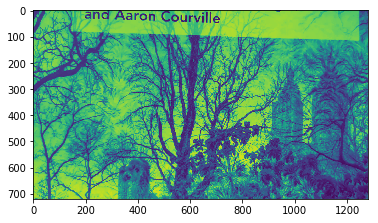

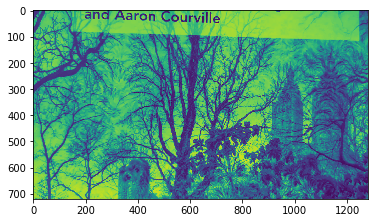

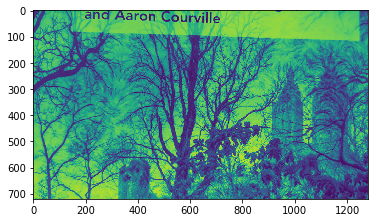

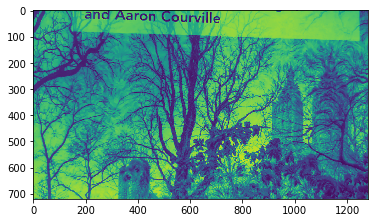

End of video
Total Frames: 4


In [2]:
video_name = 'vid_01.mp4'
cap = cv2.VideoCapture('VIDEO/' + video_name)
numOfFrames = 4
frameCount = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False or frameCount == numOfFrames:
        print("End of video")
        break;

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    plt.imshow(gray)
    plt.show()
    
    frameCount+=1

cap.release()
print("Total Frames: " + str(frameCount))

## Preconfiguration

What we are going to do first is to change the figure size for the Matplotlib plot.

In [19]:
plt.rcParams['figure.dpi'] = 150

Then, lets load the image that will be used to test the different feature detectors algorithms.

In [4]:
img_name = 'deep_learning_book.jpg'
ref_img = cv2.imread('IMG/' + img_name, cv2.IMREAD_GRAYSCALE)

## SIFT (Scale-Invariant Feature Transform )

Fist, the SIFT descriptor is created.

In [5]:
sift = cv2.xfeatures2d.SIFT_create()

error: OpenCV(4.1.0) /io/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


Then, using the SIFT detector, it gets the keypoints and its corresponding descriptors.

In [ ]:
keypoints_sift, descriptors_sift = sift.detectAndCompute(ref_img, None)

Finally, the keypoints found is drew in the image.

In [ ]:
img_sift = cv2.drawKeypoints(ref_img, keypoints_sift, None)
plt.imshow(img_sift)
plt.show()

## AKAZE

## SURF (Speeded-Up Robust Features)

Fist, the SURF descriptor is created.

In [ ]:
surf = cv2.xfeatures2d.SURF_create()

Then, using the SURF detector, it gets the keypoints and its corresponding descriptors.

In [6]:
keypoints_surf, descriptors_surf = surf.detectAndCompute(ref_img, None)

NameError: name 'surf' is not defined

Finally, the keypoints found is drew in the image.

In [7]:
img_surf = cv2.drawKeypoints(ref_img, keypoints_surf, None)
plt.imshow(img_surf)
plt.show()

NameError: name 'keypoints_surf' is not defined

## ORB (Oriented FAST and Rotated BRIEF)

__BRIEF__ (Binary Robust Independent Elementary Features) is a feature descriptor and it doesn't provide any method to find the features by itself.

Fist, the ORB descriptor is created.

In [8]:
orb = cv2.ORB_create(nfeatures=4000)

Then, using the ORB detector, it gets the keypoints and its corresponding descriptors.

In [9]:
keypoints_orb, descriptors_orb = orb.detectAndCompute(ref_img, None)

Finally, the keypoints found is drew in the image.

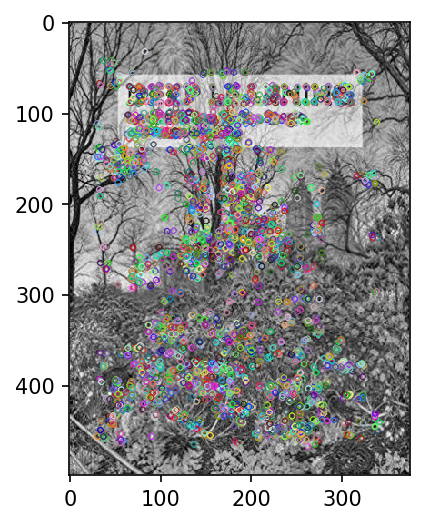

In [10]:
img_orb = cv2.drawKeypoints(ref_img, keypoints_orb, None)
plt.imshow(img_orb)
plt.show()

### ORB Matching

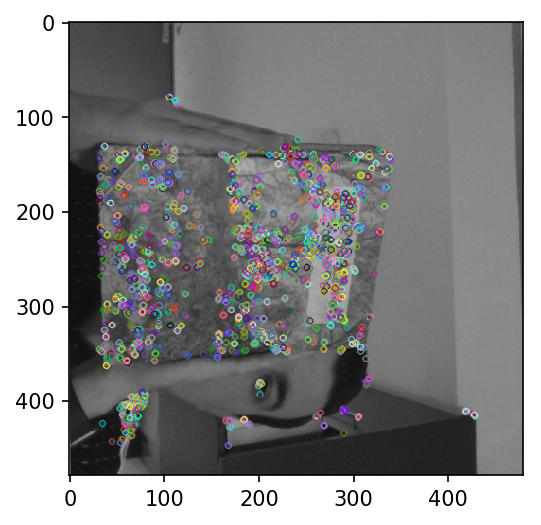

In [11]:
# Pre-configuration for matching

img_orb_2 = cv2.imread("IMG/test_3.jpg", cv2.IMREAD_GRAYSCALE)

keypoints_orb_2, descriptors_orb_2 = orb.detectAndCompute(img_orb_2, None)

img_orb_result = cv2.drawKeypoints(img_orb_2, keypoints_orb_2, None)
plt.imshow(img_orb_result)
plt.show()

Matches: 889


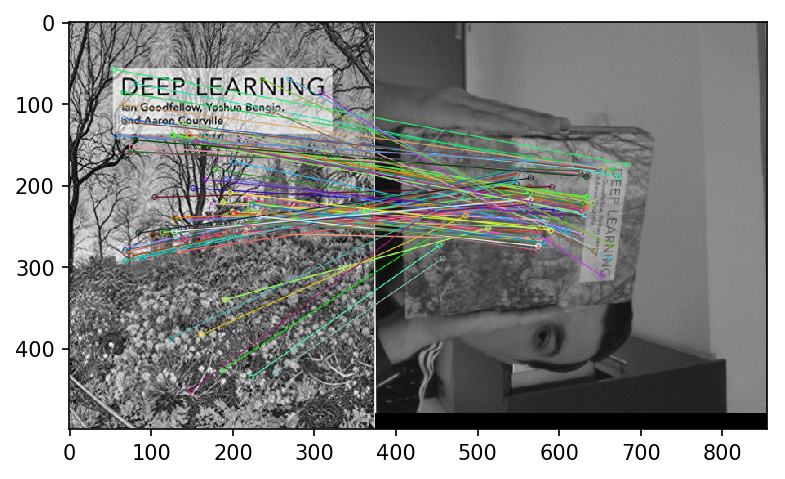

In [13]:
# Brute Force Matching

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors_orb, descriptors_orb_2)
matches = sorted(matches, key = lambda x:x.distance)

bf_orb_matching_result = cv2.drawMatches(ref_img, keypoints_orb, img_orb_2, keypoints_orb_2, matches[:100], None, flags=2)

print("Matches: " + str(len(matches)))

plt.imshow(bf_orb_matching_result)
plt.show()

Matches: 3869


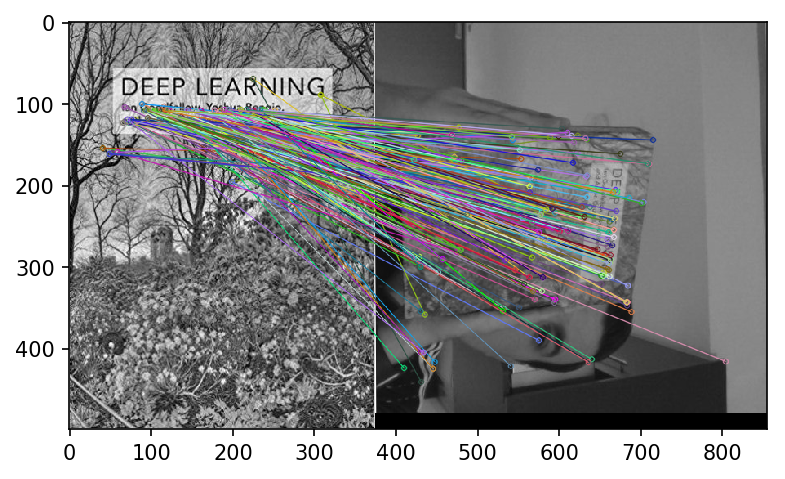

(<matplotlib.image.AxesImage at 0x7f9080a99e48>, None)

In [35]:
# FLANN Based Matching

FLANN_INDEX_LSH = 6
flann_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

flann = cv2.FlannBasedMatcher(flann_params, {})

matches = flann.knnMatch(descriptors_orb, descriptors_orb_2, k=2)

print("Matches: " + str(len(matches)))

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i, pair in enumerate(matches):
    try:
        m, n = pair
        if m.distance < 0.7 * n.distance:
            matchesMask[i]=[1,0]
    except ValueError:
        pass

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 2)

bf_orb_matching_result = cv2.drawMatchesKnn(ref_img, keypoints_orb, img_orb_2, keypoints_orb_2, matches[:100], None, flags=2)

plt.imshow(bf_orb_matching_result,),plt.show()

## BRISK (Binary Robust Invariant Scalable Keypoints)

Fist, the BRISK descriptor is created.

In [15]:
brisk = cv2.BRISK_create()

Then, using the BRISK detector, it gets the keypoints and its corresponding descriptors.

In [16]:
keypoints_brisk, descriptors_brisk = brisk.detectAndCompute(ref_img, None)

Finally, the keypoints found is drew in the image.

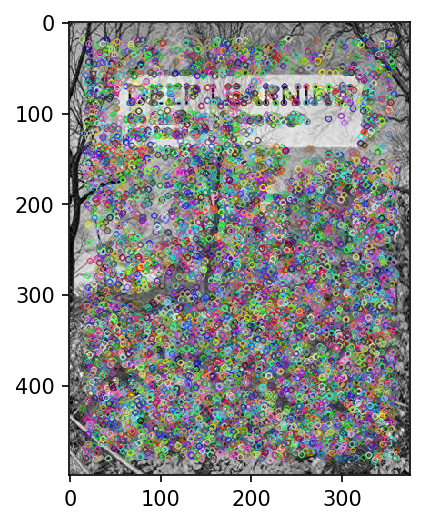

In [17]:
img_brisk = cv2.drawKeypoints(ref_img, keypoints_brisk, None)
plt.imshow(img_brisk)
plt.show()

### BRISK Matching

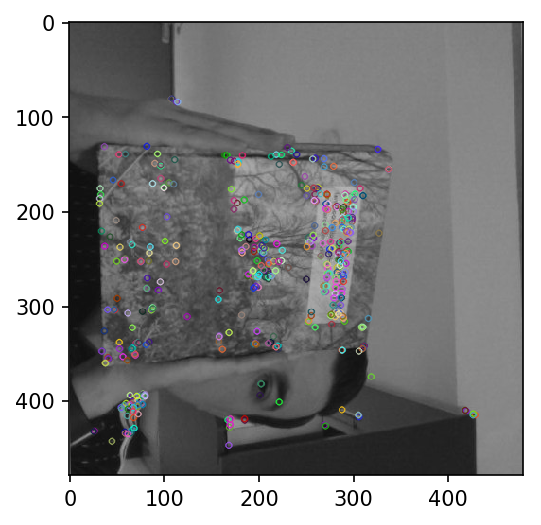

In [23]:
# Pre-configuration for matching

img_brisk_2 = cv2.imread("IMG/test_3.jpg", cv2.IMREAD_GRAYSCALE)

keypoints_brisk_2, descriptors_brisk_2 = brisk.detectAndCompute(img_brisk_2, None)

img_brisk_result = cv2.drawKeypoints(img_brisk_2, keypoints_brisk_2, None)
plt.imshow(img_brisk_result)
plt.show()


Matches: 326


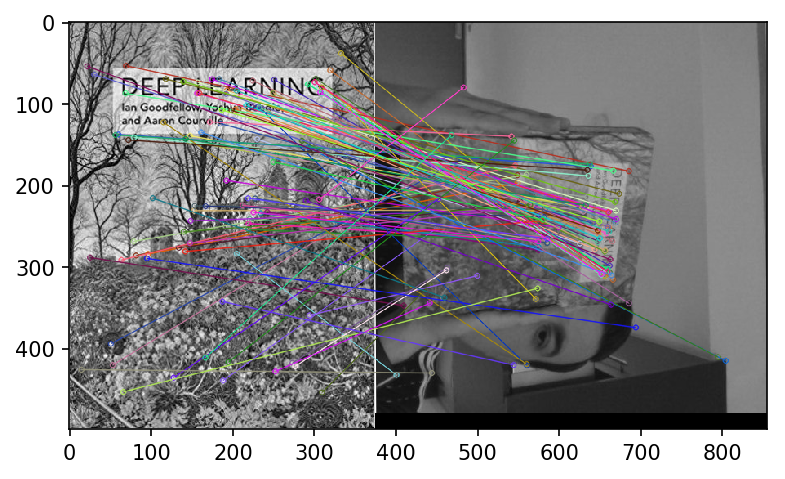

In [25]:
# Brute Force Matching

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors_brisk, descriptors_brisk_2)
matches = sorted(matches, key = lambda x:x.distance)

bf_brisk_matching_result = cv2.drawMatches(ref_img, keypoints_brisk, img_brisk_2, keypoints_brisk_2, matches[:100], None, flags=2)

print("Matches: " + str(len(matches)))

plt.imshow(bf_brisk_matching_result)
plt.show()

Matches: 8136


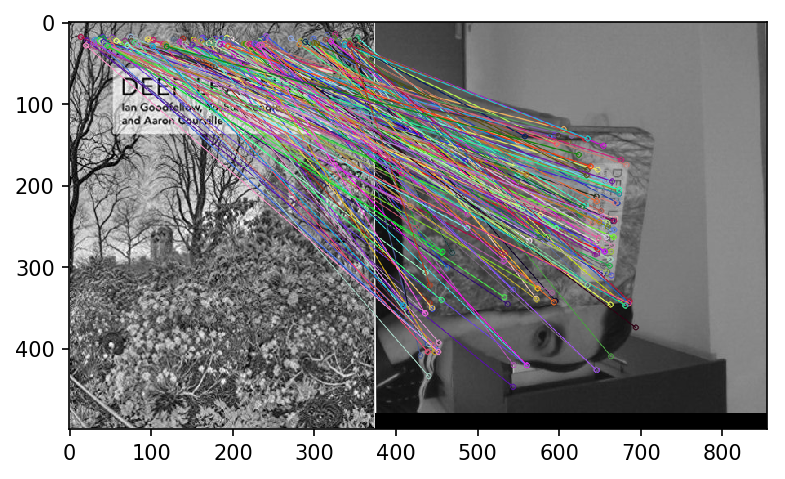

(<matplotlib.image.AxesImage at 0x7f90847f2828>, None)

In [34]:
# FLANN Based Matching

FLANN_INDEX_LSH = 6
flann_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

flann = cv2.FlannBasedMatcher(flann_params, {})

matches = flann.knnMatch(descriptors_brisk, descriptors_brisk_2, k=2)

print("Matches: " + str(len(matches)))

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i, pair in enumerate(matches):
    try:
        m, n = pair
        if m.distance < 0.7 * n.distance:
            matchesMask[i]=[1,0]
    except ValueError:
        pass

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 2)

bf_brisk_matching_result = cv2.drawMatchesKnn(ref_img, keypoints_brisk, img_brisk_2, keypoints_brisk_2, matches[:100], None, flags=2)

plt.imshow(bf_brisk_matching_result,),plt.show()